In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
import numpy as np

list_finding = ["MISSING", "IMPLANT", "ROOT_REMNANTS", "CARIES", "ENDO", "CROWN_BRIDGE", "PERIAPICAL_RADIOLUCENT", "FILLING"]
finding = "ENDO"

df_golden = pd.read_csv("ntuh_golden.csv")
df_result = pd.read_csv("/mnt/hdd/PANO.arlen/results/2023-07-23-024938/result_th0p01.csv")

file_list = pd.unique(df_golden["file_name"]).tolist()

df_golden_finding = df_golden[df_golden["finding"] == finding]
df_result_finding = df_result[df_result["finding"] == finding]

In [37]:
df_result = pd.DataFrame()
for i in file_list:
    file_golden = df_golden_finding[df_golden_finding["file_name"] == i]
    file_result = df_result_finding[df_result_finding["file_name"] == i]

    df_full_tooth: pd.DataFrame = pd.DataFrame(
        [
            {"fdi": int(f"{quadrant}{tooth}")}
            for quadrant in range(1, 5)
            for tooth in range(1, 9)
        ]
    )

    df_full_tooth["golden"] = df_full_tooth["fdi"].isin(file_golden["fdi"]).astype(int)
    df_full_tooth = pd.merge(df_full_tooth, file_result[["fdi", "score"]], left_on="fdi", right_on="fdi", how="left")
    df_full_tooth["score"].fillna(0, inplace=True)
    
    df_result = pd.concat([df_result, df_full_tooth], ignore_index=True)

    # if sum(df_full_tooth["golden"] - df_full_tooth.loc[df_full_tooth["score"]!=0]) > 0:
    #     print(i)
    #     break

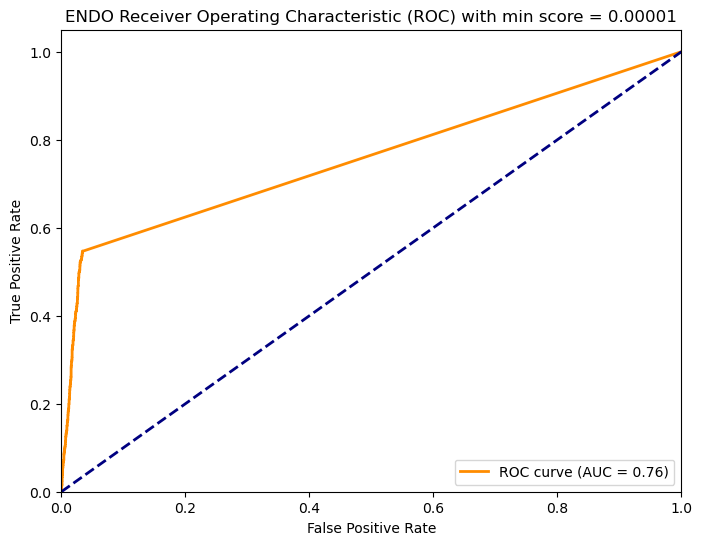

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd

golden = df_result["golden"]
score = df_result["score"]

fpr, tpr, thresholds = roc_curve(golden, score, drop_intermediate=False)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('{} Receiver Operating Characteristic (ROC) with min score = 0.00001'.format(finding))
plt.legend(loc='lower right')
plt.show()


In [39]:
thresholds

array([1.99299753, 0.99299753, 0.99263763, 0.99200398, 0.99144018,
       0.9913578 , 0.9910745 , 0.99070054, 0.99061793, 0.9904896 ,
       0.99012834, 0.98998076, 0.98964208, 0.98937958, 0.9890548 ,
       0.9889459 , 0.98810762, 0.98773021, 0.98718178, 0.98668474,
       0.986628  , 0.98600036, 0.98588747, 0.98467225, 0.98457319,
       0.98431706, 0.98420507, 0.9840126 , 0.98396111, 0.98377889,
       0.98334163, 0.98315561, 0.98295617, 0.98250073, 0.98226339,
       0.98188293, 0.98138535, 0.98118836, 0.98098904, 0.98033971,
       0.98021483, 0.97975779, 0.97960323, 0.97954583, 0.97941226,
       0.97784585, 0.97775888, 0.97753155, 0.97705394, 0.97676134,
       0.97667116, 0.97626829, 0.97576118, 0.97553432, 0.97527087,
       0.97473675, 0.97469914, 0.97459394, 0.97390985, 0.97383612,
       0.97347969, 0.97316372, 0.97311193, 0.97307283, 0.97299576,
       0.97149682, 0.97107601, 0.9708944 , 0.97082919, 0.97028446,
       0.96908903, 0.96835798, 0.96825498, 0.96824843, 0.96763